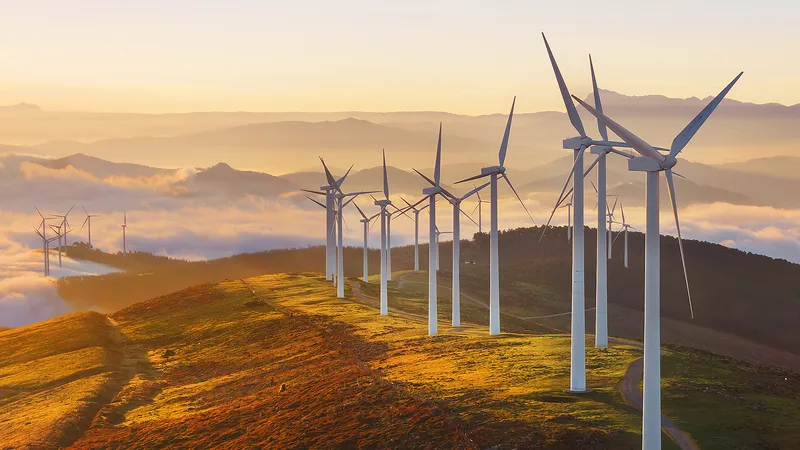

### 1. Introduction

In this kernal, I am investigating the dataset ["Global Renewable Energy Production (2000-2023)"](https://www.kaggle.com/datasets/ahmedgaitani/global-renewable-energy) by Ahmed Gaitani. The dataset has information on energy generation from solar, wind, hydro, and other renewable sources from the years from 2000 to 2023. The data available comes from 10 countries: USA, China, India, Germany, UK, France, Brazil, Canada, Australia, and Japan. I will be analyzing if particular renewable energy sources are growing or shrinking, what countries contribute the most to global renewable energy, and if there are any trends. 

### 2. Load libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

%matplotlib inline

### 3. Data overview

In [2]:
data = pd.read_csv('global_renewable_energy_production.csv')

print('Data that is missing:')
print(data.isnull().sum())

data.describe(include='all')

Data that is missing:
Year                    0
Country                 0
SolarEnergy             0
WindEnergy              0
HydroEnergy             0
OtherRenewableEnergy    0
TotalRenewableEnergy    0
dtype: int64


,Year,Country,SolarEnergy,WindEnergy,HydroEnergy,OtherRenewableEnergy,TotalRenewableEnergy
count,240.000000,240,240.000000,240.000000,240.000000,240.000000,240.000000
unique,NaN,10,NaN,NaN,NaN,NaN,NaN
top,NaN,USA,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN
mean,2011.500000,NaN,528.523858,857.133260,1076.581975,287.127554,2749.366647
std,6.936653,NaN,271.183089,375.020314,499.981598,128.460792,695.126957
min,2000.000000,NaN,104.555425,206.021630,320.662607,54.876943,910.381025
25%,2005.750000,NaN,284.700505,523.572495,593.796081,176.322725,2250.759951
50%,2011.500000,NaN,533.436429,882.024084,1046.390380,291.398276,2815.458943
75%,2017.250000,NaN,766.701662,1160.199295,1495.160715,405.479393,3217.212712


In [3]:
data.head()

,Year,Country,SolarEnergy,WindEnergy,HydroEnergy,OtherRenewableEnergy,TotalRenewableEnergy
0,2000,USA,437.086107,1435.928598,1544.389701,319.396318,3736.800724
1,2001,USA,240.416776,402.792876,398.742141,439.779266,1481.731059
2,2002,USA,641.003511,1120.494351,334.993640,486.459433,2582.950935
3,2003,USA,849.198377,476.040844,609.102444,132.532029,2066.873694
4,2004,USA,373.818019,882.183361,1034.306532,181.053113,2471.361025


In [4]:
data.dtypes

Year                      int64
Country                  object
SolarEnergy             float64
WindEnergy              float64
HydroEnergy             float64
OtherRenewableEnergy    float64
TotalRenewableEnergy    float64
dtype: object

In [5]:
data.shape

(240, 7)

There is no missing data and the data types seem to be correct. We can continue straight the the data analysis.

### 4. Data exploration

_Pairplot to get an understanding of the distribution and relationship of the data_

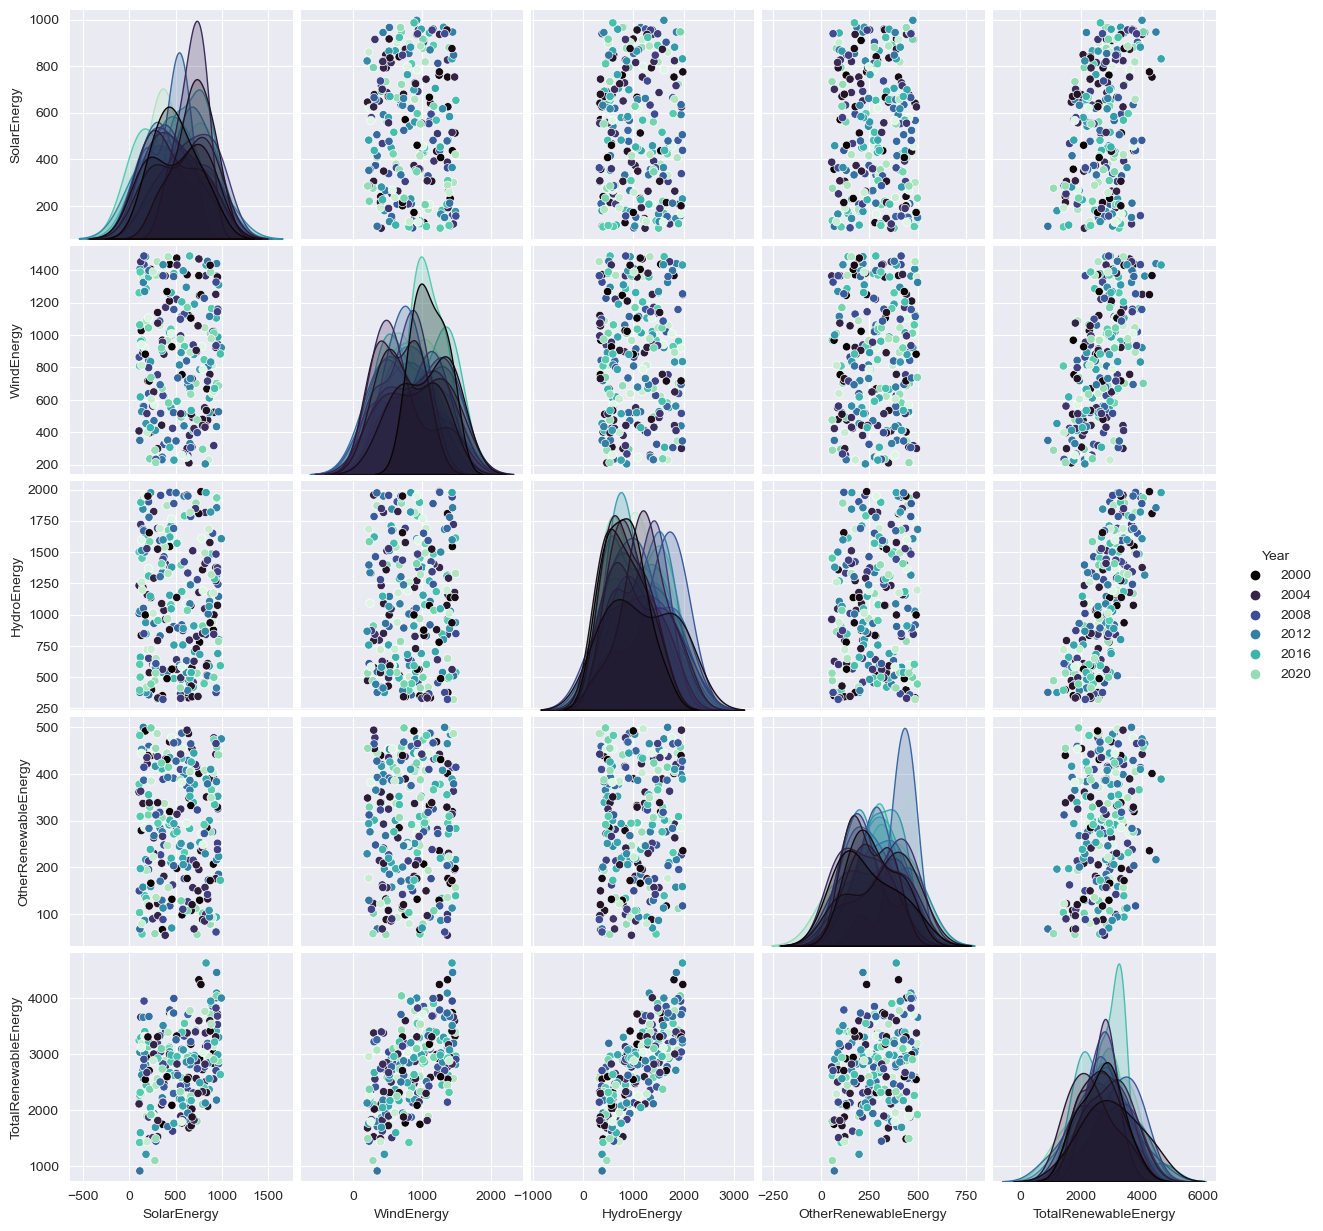

In [6]:
sns.pairplot(data, diag_kind='kde', palette='mako', hue='Year')

_Correlation heatmap to show correlation between numerical columns_

<Axes: >

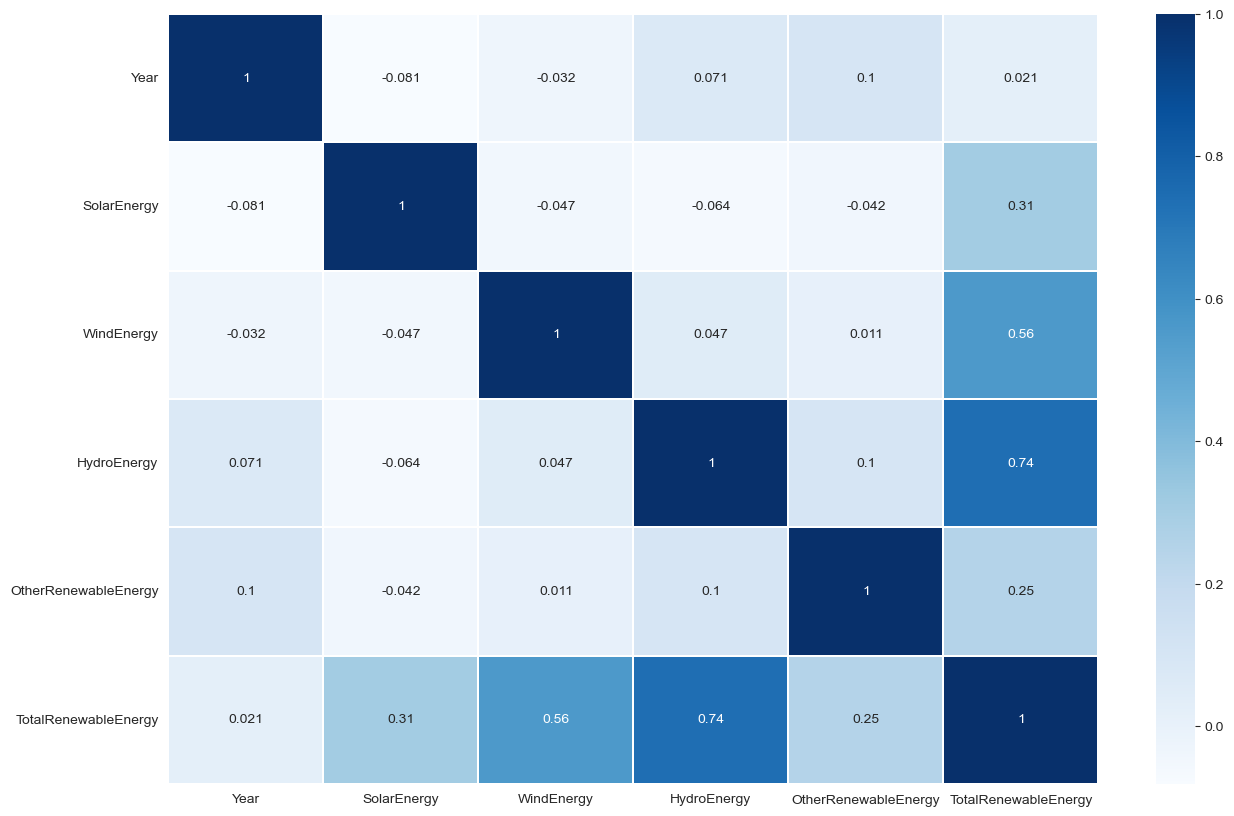

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(data.select_dtypes(include='number').corr(), linewidths=0.2, annot=True, cmap='Blues')

Based on the heatmap above, it looks like wind energy and hydro energy may be the biggest contributors to total renewable energy based on this heatmap. Let's explore further by plotting these correlations.

Text(0.5, 1.0, 'Correlation: 0.5573')

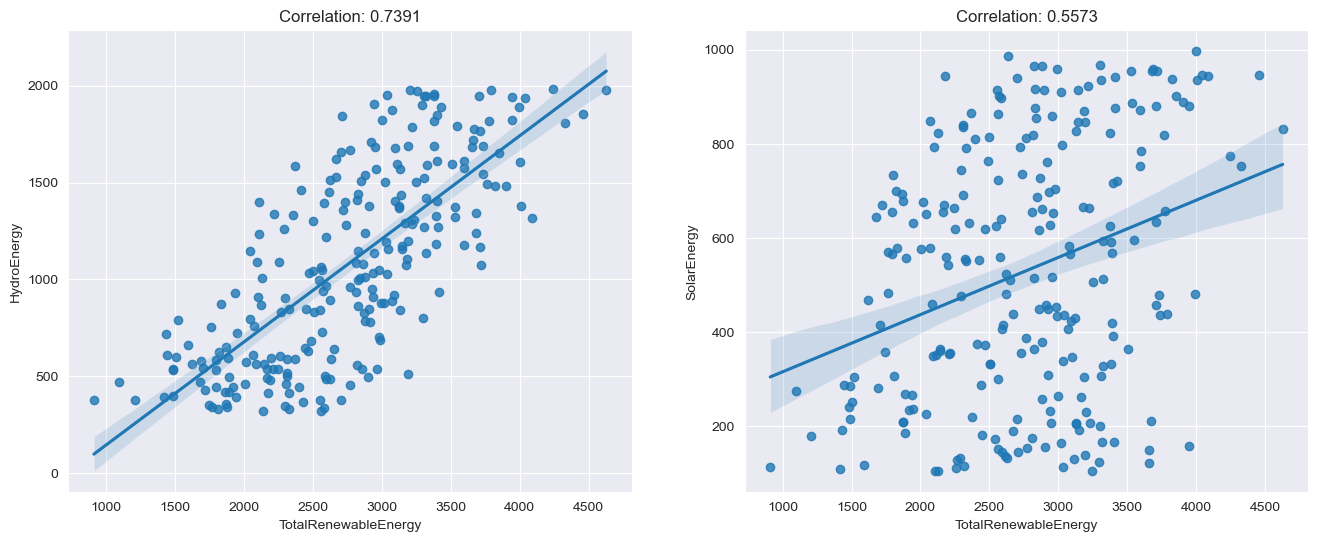

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes = axes.flatten()

# plot hydro energy correlation
sns.regplot(data=data, x='TotalRenewableEnergy', y='HydroEnergy', ax=axes[0])
axes[0].set_title(f"Correlation: {round(data['TotalRenewableEnergy'].corr(data['HydroEnergy']), 4)}")

# plot wind energy correlation
sns.regplot(data=data, x='TotalRenewableEnergy', y='SolarEnergy', ax=axes[1])
axes[1].set_title(f"Correlation: {round(data['TotalRenewableEnergy'].corr(data['WindEnergy']), 4)}")

The strong correlation between hydro energy and total energy suggests that hydro energy is a strong contributing factor.

This makes me curious as to what percentage of total renewable energy comes from each source. We will create a plot to first visualize how energy production has changed over time for each energy source.

Text(0, 0.5, 'Gigawatt-Hours (GWh)')

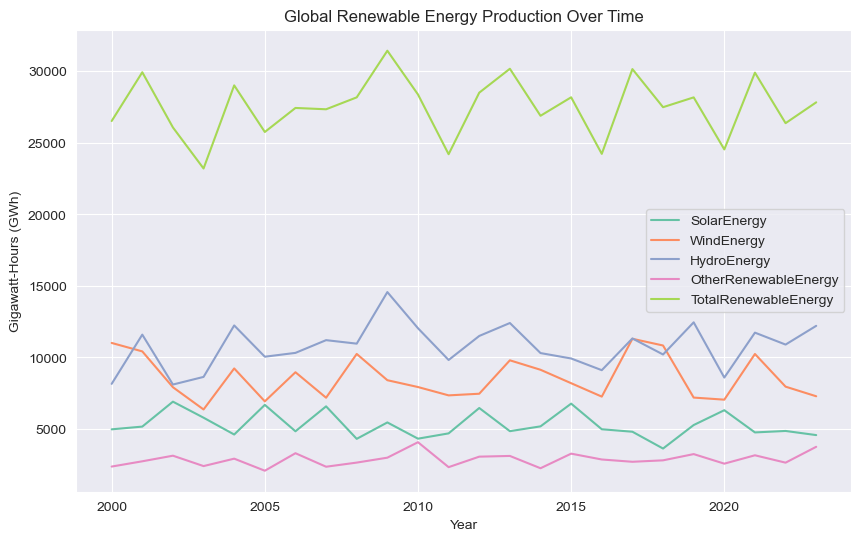

In [9]:
# create new dataframe

yearly_energy = data.select_dtypes(include='number').groupby('Year').sum()

# plot trends

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_energy, palette='Set2', dashes=False)
plt.title('Global Renewable Energy Production Over Time')
plt.ylabel('Gigawatt-Hours (GWh)')

Now let's look at how the ratios have changed over time.

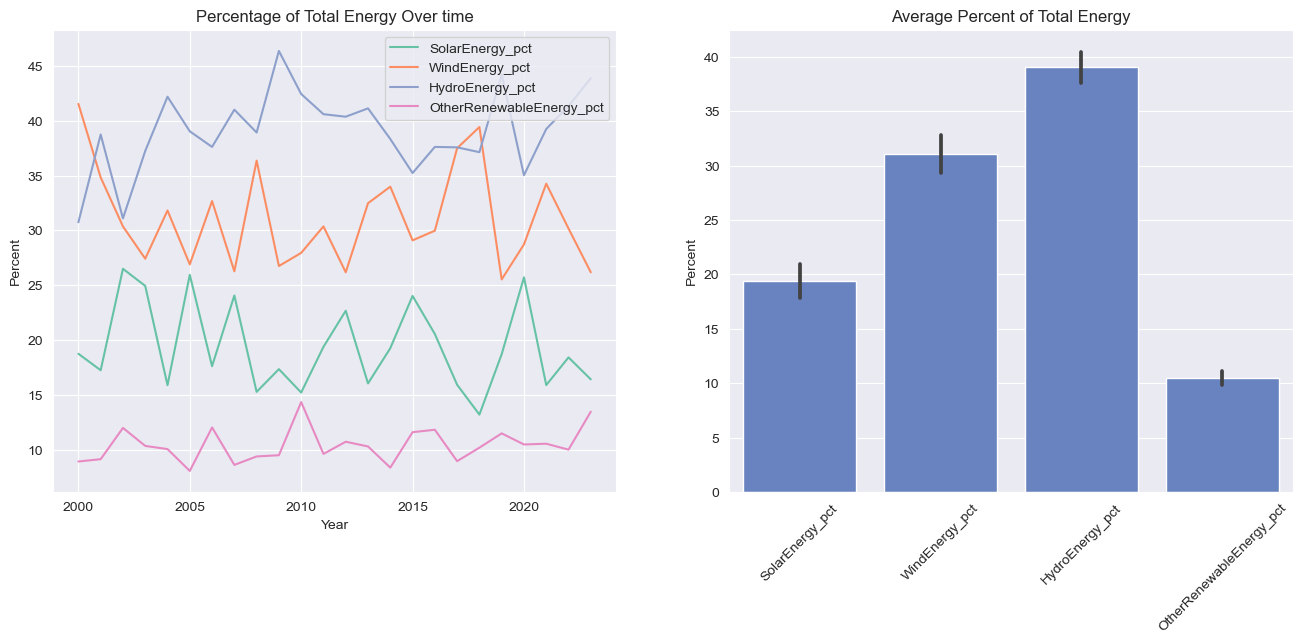

In [10]:
# make a new dataframe with columns for energy source ratios

ratios = yearly_energy.copy(deep=True)

for col in ratios.columns:
    if col != 'TotalRenewableEnergy':
        ratios[col + '_pct'] = round(ratios[col] / ratios['TotalRenewableEnergy'] * 100, 2)

ratios = ratios[['SolarEnergy_pct', 'WindEnergy_pct',
       'HydroEnergy_pct', 'OtherRenewableEnergy_pct']]

# create subplots

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes = axes.flatten()

#lineplot

sns.lineplot(data=ratios, ax=axes[0], palette='Set2', dashes=False)
axes[0].set_title('Percentage of Total Energy Over time')
axes[0].set_ylabel('Percent')

# stacked barplot

sns.barplot(data=ratios, ax=axes[1], color='#597dce')
axes[1].set_title('Average Percent of Total Energy')
axes[1].set_ylabel('Percent')

for tick in axes[1].get_xticklabels():
    tick.set_rotation(45)

It seems that each energy source fluctuates over the years with no clear trend. However, we are able to see which energy sources contribute the most to total renewable energy:
1. Hydro energy
2. Wind energy
3. Solar energy
4. Other renewable energy

Let's take a look at how countries stack up against one another, and which energy sources are most prevelant in each country. We will plot the total energy produced each year for each country below.

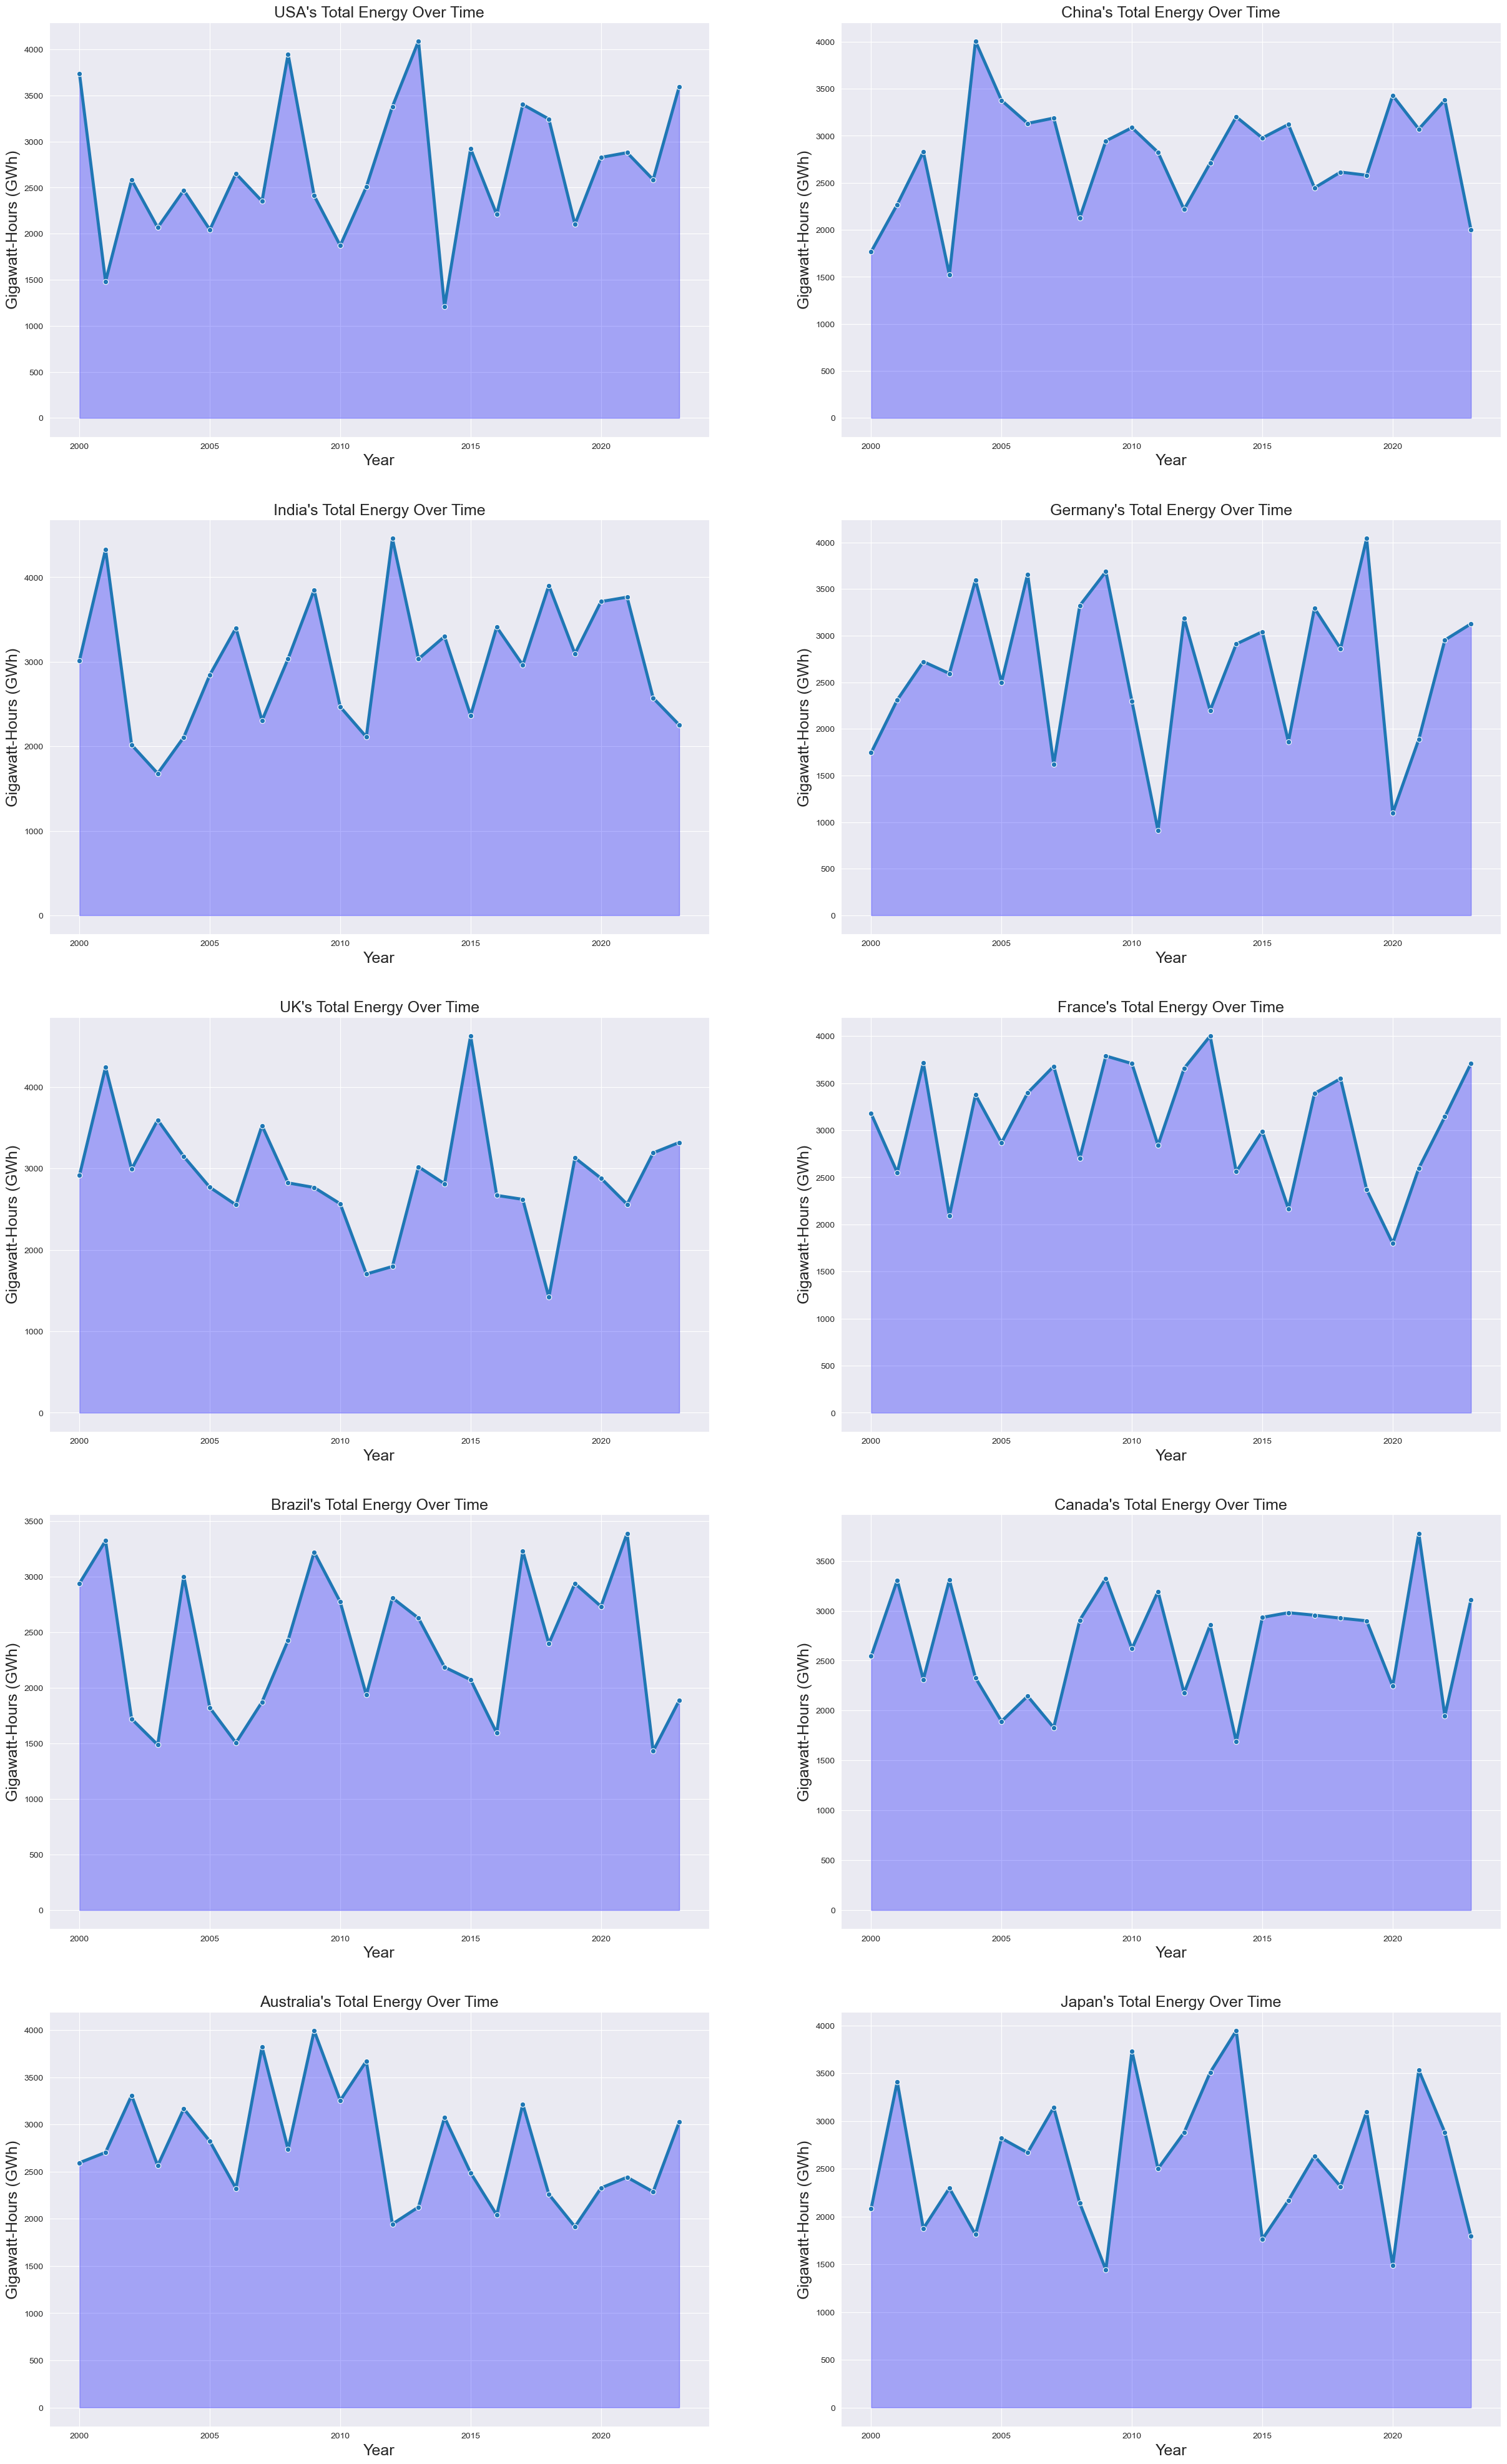

In [11]:
fig, axes = plt.subplots(5, 2, figsize=(30, 50))

axes = axes.flatten()

for i, country in enumerate(data['Country'].unique()):
    temp = data[data['Country'] == country]
    sns.lineplot(data=temp, ax=axes[i], x='Year', y='TotalRenewableEnergy', marker='o', linewidth=3.5)
    axes[i].fill_between(temp['Year'], temp['TotalRenewableEnergy'], alpha=0.3, color='b')
    axes[i].set_title(f"{country}'s Total Energy Over Time", fontsize=18)
    axes[i].set_ylabel('Gigawatt-Hours (GWh)', fontsize=18)
    axes[i].set_xlabel('Year', fontsize=18)

Based on the graphs, there is no discernable trend of increased or decreased energy production in any of the 10 countries. Total renewable energy varies widely year by year.

Now we'll take a look at what countries lead in total renewable energy production.

Text(0.5, 1.0, 'Average Total Renewable Energy')

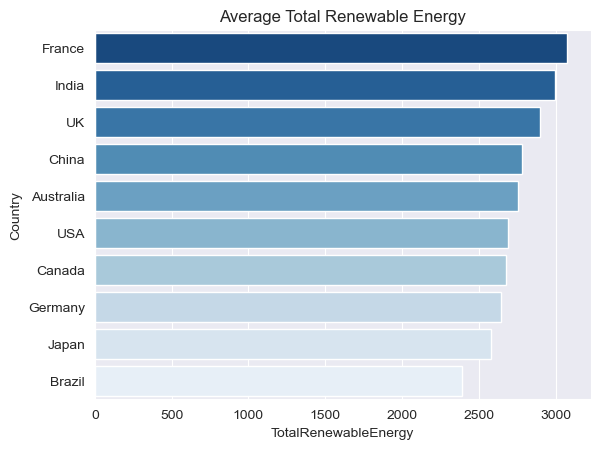

In [12]:
total_ranks = data.groupby('Country').mean().reset_index().sort_values('TotalRenewableEnergy', ascending=False)

sns.barplot(data=total_ranks, x='TotalRenewableEnergy', y='Country', palette='Blues_r')
plt.title('Average Total Renewable Energy')

Now we will rank each country based on different types of energy production using a heatmap.

Text(0.5, 1.0, 'Country Rankings by Energy Source Production')

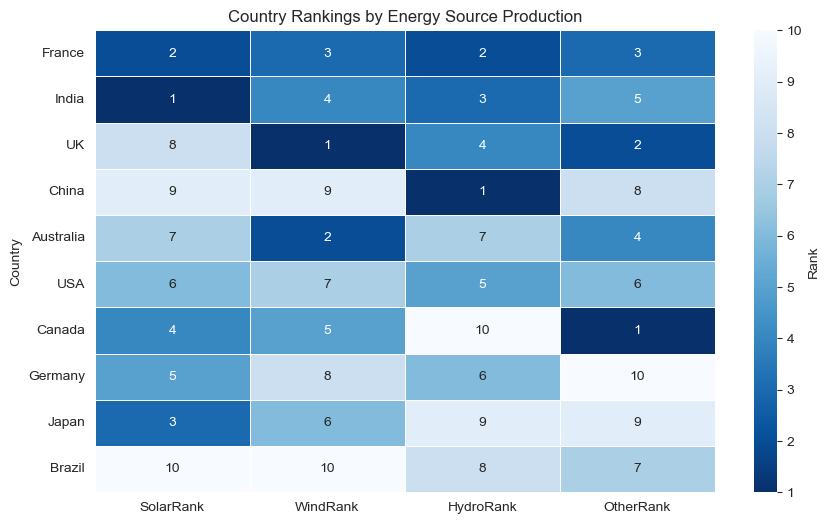

In [13]:
# assign ranks to each country

source_ranks = total_ranks.copy()

source_ranks['SolarRank'] = source_ranks['SolarEnergy'].rank(ascending=False)
source_ranks['WindRank'] = source_ranks['WindEnergy'].rank(ascending=False)
source_ranks['HydroRank'] = source_ranks['HydroEnergy'].rank(ascending=False)
source_ranks['OtherRank'] = source_ranks['OtherRenewableEnergy'].rank(ascending=False)

source_ranks = source_ranks[['Country', 'SolarRank', 'WindRank', 'HydroRank', 'OtherRank']].set_index('Country')

# plot heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(source_ranks, annot=True, cmap="Blues_r", cbar_kws={'label': 'Rank'}, linewidths=.5)
plt.title('Country Rankings by Energy Source Production')

### 5. Conclusion

After analyzing the data, there are no distinguishable trends in total renewable energy production or energy production for each individual source. Energy production fluctuates year over year. On the other hand, we did find that France, the UK, and India have been the highest renewable energy producers over the past couple of decades. In addition, we were able to view the rankings of each country in accordance with energy type.

If I were to continue exploring this data I would like to incorporate any data on fossil fuel use, energy consumption and needs by country, and weather. Using this data I would be able to see if energy consumtpion outpaces renewable energy production and whether or not fossil fuel use has been declining over the past couple of decades. Using the weather data I could go into an interesting analysis of what countries have suitable conditions for what particular types of renewable energy production. Weather data may also give interesting insights into small dropoffs or increases energy production for certain sources. 